<a href="https://colab.research.google.com/github/Yukiharossauro/imersao_alura_3/blob/main/Imers%C3%A3o_03_aula_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Imersão Alura - Aula 1 - 03/05/2021


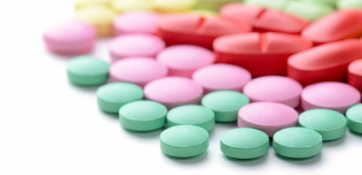

O dataframe a seguir aborda um estudo feito com n amostras de cultura celular e sua resposta à diversos fármacos.

# Importando bibliotecas importantes e dados de trabalho

In [28]:
import pandas as pd
import numpy as np
import seaborn as sns
import missingno as msno
import matplotlib.pyplot as plt

As bibliotecas acima são a base de trabalho para manipulação de dados e também visualização. Possivelmente algumas outras bibliotecas gráficas sejam importadas para um estudo mais dinâmico.

Para manter um código limpo, vamos criar a variável url_dados abaixo, desta maneira conseguimos criar nosso dataframe de maneira mais clean

In [4]:
url_dados = 'https://github.com/alura-cursos/imersaodados3/raw/main/dados/dados_experimentos.zip'

Como o arquivo fornecido pela Alura está zipado, passamos o paratmetro COMPRESSION para o código abaixo.

In [5]:
df = pd.read_csv(url_dados, compression = 'zip')

# Definição - Célula

Fonte: https://pt.wikipedia.org/wiki/C%C3%A9lula

Abaixo uma definição resumida sobre célula. Como o foco não é aprofundar o conhecimento sobre citologia, não entrarei nas organelas e todos os componentes celulares.

"A célula (do latim cella, que significa "pequeno aposento")[1] é a unidade básica e fundamental de todos os organismos conhecidos. Uma célula é a menor unidade funcional da matéria viva. As células são frequentemente chamadas de "blocos de construção da vida". O estudo das células é denominado biologia celular ou citologia.

Todas as as células são compostas por citoplasma, constituído por água e biomoléculas, como ácidos nucleicos e e proteínas, envolto por uma membrana plasmática. A maioria das células vegetais e animais são visíveis apenas ao microscópio, apresentando dimensões entre 1 e 100 micrômetros.[2] Os organismos podem ser classificados como unicelulares (consistindo em uma única célula, como as bactérias) ou multicelulares (incluindo plantas e animais). A maioria dos organismos unicelulares são classificados como microorganismos."



Com o comando shape, conseguimos ter as dimensÕes da nossa matriz. Ou seja, temos 877 colunas por 23814 linhas.
Cada linha é uma cultura de célula que foi exposta ou não à certo fármaco (droga)

Imagem ilustrativa de uma célula eucarionte:

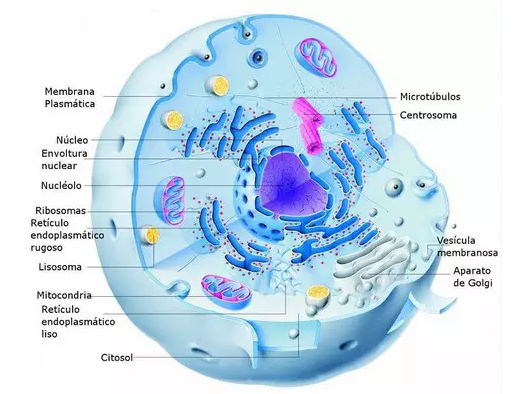

Fonte da imagem: https://www.educamaisbrasil.com.br/enem/biologia/citoesqueleto

# Definição - Cultura celular

Fonte : https://pt.wikipedia.org/wiki/Cultura_celular

Cultura celular ou cultura de células é o processo pelo qual células são cultivadas sob condições controladas, geralmente fora de seu ambiente natural. Essas condições variam para cada tipo de célula, mas geralmente consistem em um recipiente adequado com um substrato ou meio que fornece os nutrientes essenciais, como aminoácidos, carboidratos, vitaminas, minerais), fatores de crescimento, hormônios e gases (CO2 e O2) e regula o ambiente físico-químico (tampão de pH, pressão osmótica, temperatura). A maioria das células requer uma superfície ou um substrato artificial (cultura aderente ou monocamada), enquanto outras podem ser cultivadas flutuando livremente no meio de cultura. O tempo de vida da maioria das células é determinado geneticamente, mas algumas células em cultura de células foram “transformadas” em células imortais que se reproduzirão indefinidamente se as condições ideais forem fornecidas.

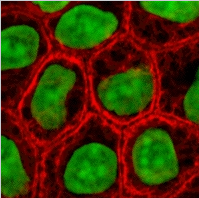

Acima podemos ver células epiteliais em cultura. Sendo a parte vermelha, queratina, e a verde DNA.

# Definição - Expressão gênica

Seguindo a explicação da Vanessa, cada trecho de DNA é também conhecido como gene. 

O gene é responsável por conter informação genética que possibilita ao RNA mensageiro levar estas informações até os locais onde as respectivas proteinas são sintetizadas. Fatores internos e externos, tais como drogas, hormônios, estresse, luz, temperatura, pH etc...podem desencadear respostas diferentes. Estas respostas diferentes também são chamadas de expressão gênica. Abaixo a imagem compartilhada na primeira aula da Imersão de dados Alura.

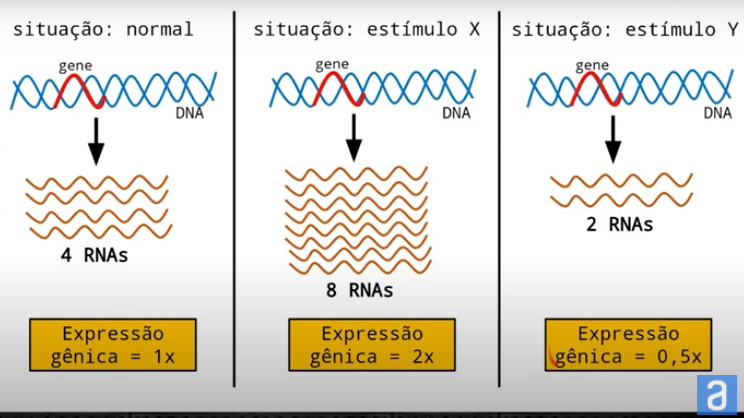

As colunas g# e c# são reflexo destas respostas, que podem ser para mais ou para menos dependendo do estímulo.

# Conhecendo nossos dados

In [29]:
df.shape

(23814, 877)

Nosso dataframe é composto de 877 variáveis (colunas) e 23814 samples. Cada sample neste estudo representa uma cultura celular que foi submetida à um determinado estudo. Seja ela com ou sem fármaco (droga).

In [30]:
df.head()

id tratamento  tempo dose  ...    c-96    c-97    c-98    c-99
0  id_000644bb2  com_droga     24   D1  ... -0.3981  0.2139  0.3801  0.4176
1  id_000779bfc  com_droga     72   D1  ...  0.1522  0.1241  0.6077  0.7371
2  id_000a6266a  com_droga     48   D1  ... -0.6417 -0.2187 -1.4080  0.6931
3  id_0015fd391  com_droga     48   D1  ... -1.6210 -0.8784 -0.3876 -0.8154
4  id_001626bd3  com_droga     72   D2  ...  0.1094  0.2885 -0.3786  0.7125

[5 rows x 877 columns]

**id - inicialmente esta coluna parece identificar as culturas celulares. Vamos analisar**

In [31]:
df.id.describe()

count            23814
unique           23814
top       id_61e1cc3bb
freq                 1
Name: id, dtype: object

A coluna id possui 23814 valores únicos, desta forma temos 23814 culturas diferentes. Ou seja, a mesma cultura não é submetida ao mesmo estudo 2 vezes ou exposta à um segundo estudo.

O tipo de informação contida aqui é [object] ou seja, é uma string

**tratamento - inicialmente classfica qual cultura foi ou não exposta à fármacos**

In [32]:
df.tratamento.describe()

count         23814
unique            2
top       com_droga
freq          21948
Name: tratamento, dtype: object

Temos também o mesmo número de culturas celulares (23814). Mas desta vez possuimos apenas 2 valores únicos.

In [33]:
df.tratamento.value_counts()

com_droga       21948
com_controle     1866
Name: tratamento, dtype: int64

In [103]:
df.tratamento.value_counts(normalize= True)

com_droga       0.921643
com_controle    0.078357
Name: tratamento, dtype: float64

Temos 2 valores: com_droga e com_controle. 

O valor [com_controle] indica que apenas o fator fármaco foi alterado na cultura celular, ou seja, as demais variáveis se mantiveram igual se comparadas às amostras [com_droga].

O valor [com_droga] indica que aquela cultura celular foi exposta ao fármaco em questão.

De forma visual, temos o gráfico abaixo:

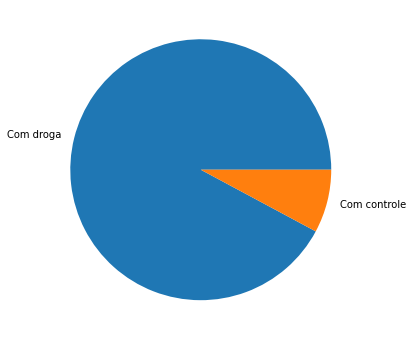

In [100]:
fig, ax = plt.subplots(figsize = (6,6))
plt.pie(df.tratamento.value_counts(), labels = ['Com droga', 'Com controle'])
plt.show()

**tempo - inicialmente indica o tempo que a cultura celular foi exposta ao fármaco**

In [11]:
df.tempo.describe()

count    23814.000000
mean        48.020156
std         19.402807
min         24.000000
25%         24.000000
50%         48.000000
75%         72.000000
max         72.000000
Name: tempo, dtype: float64

A coluna tempo, diferente do até então visto apresenta valores numéricos.

In [12]:
len(df.tempo.unique())

3

Temos aqui apenas 3 valores únicos.

In [13]:
df.tempo.unique()

array([24, 72, 48])

Pelos valores únicos, vemos que as culturas celulares foram expostas à 1, 2 e 3 dias ao fármaco em questão.

Este tempo de exposição está associado à cinética química das células x fármaco. Diferentes drogas possuem diferentes cinéticas químicas com difrentes rotas bioquímicas.

In [14]:
df.tempo.value_counts()

48    8250
72    7792
24    7772
Name: tempo, dtype: int64

In [104]:
df.tempo.value_counts(normalize= True)

48    0.346435
72    0.327202
24    0.326363
Name: tempo, dtype: float64

Aparentemente o dataframe está bem distribuido entre estas variáveis. Não temos aqui um viés para tempo.

De forma visual, temos:

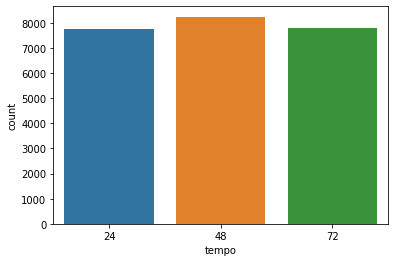

In [102]:
sns.countplot(data = df, x = 'tempo')
plt.show()

**dose - Inicialmente indica a dose de fármaco à qual a cultura celular foi exposta**

In [15]:
df.dose.describe()

count     23814
unique        2
top          D1
freq      12147
Name: dose, dtype: object

Aqui temos 2 valores únicos e a coluna é do tipo [object]

In [16]:
df.dose.unique()

array(['D1', 'D2'], dtype=object)

Neste caso temos 2 grandes grupos de doses: D1 e D2.

In [17]:
df.dose.value_counts()

D1    12147
D2    11667
Name: dose, dtype: int64

In [105]:
df.dose.value_counts(normalize= True)

D1    0.510078
D2    0.489922
Name: dose, dtype: float64

O estudo também apresenta uma boa distribuiçao entre D1 e D2, aparentemente com baixo viés.

De forma visual, temos: 

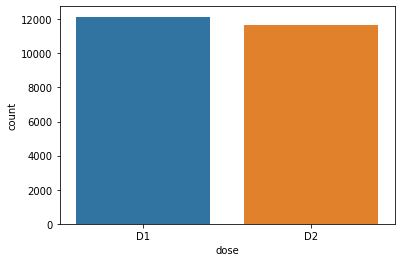

In [106]:
sns.countplot(data = df, x = 'dose')
plt.show()

**droga - indicando possivelmente qual o fármaco/droga a ser estudado**

In [18]:
df.droga.describe()

count         23814
unique         3289
top       cacb2b860
freq           1866
Name: droga, dtype: object

Este estudo contempla uma grande variedade de fármacos/drogas (3289). Possivelmente foi designado um nome específico para a droga de controle, mesmo que ela não tenha efeitos clínicos.

In [19]:
df.query('tratamento == "com_controle"').droga.value_counts()

cacb2b860    1866
Name: droga, dtype: int64

Desta forma temos um estudo com 3288 substâncias reais e uma de controle (cacb2b860).

In [20]:
df.droga.value_counts()

cacb2b860    1866
87d714366     718
9f80f3f77     246
8b87a7a83     203
5628cb3ee     202
             ... 
b36078dd2       1
d532d49de       1
809527b9d       1
44bba684f       1
36dc71f82       1
Name: droga, Length: 3289, dtype: int64

Para facilitar a avaliação e entendimento, criarei o df_droga para análise complementar.

In [21]:
df_droga = pd.DataFrame(df.droga.value_counts())

In [22]:
df_droga.reset_index(inplace = True)

In [23]:
len(df_droga.query('droga > 1'))

3160

In [24]:
len(df_droga) - len(df_droga.query('droga > 1'))

129

Temos 129 drogas que foram testadas em apenas 1 cultura celular. Drogas testadas em poucas culturas podem ter resultados não relevantes para o estudo.

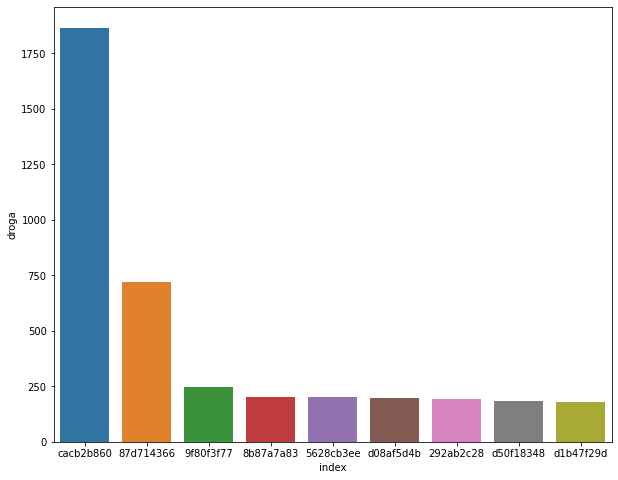

In [34]:
fig, ax = plt.subplots(figsize = (10,8))
sns.barplot(data = df_droga.query('droga > 30'), x = 'index', y = 'droga')

Aqui podemos observar que a droga mais testada foi a de controle (placebo). Apenas 8 drogas foram testadas em mais de 30 culturas conforme a query que foi realizada.

# Desafio 01 - Aula 1

Descrição: Investigar por que a feature Tratamento é tão desbalanceada

Proposta: Tendo em vista o paper abaixo

https://moodle.ufsc.br/pluginfile.php/821909/mod_resource/content/0/WEYNE%20-%20Determina%C3%A7%C3%A3o%20do%20tamanho%20da%20amostra%20EM%20PESQUISAS%20EXPERIMENTAIS%20-%202004.pdf

Podemos observar que para um estudo clínico randomizado, o ideal é que o grupo de controle tenha no mínimo o mesmo tamanho dos ensaios que de fato utilizaram a droga.

Para responder o desafio, assumirei algumas premissas:

1 - Todas as drogas são destinadas ao tratamento da mesma comorbidade
2 - Cada droga é um estudo clínico diferente, ou seja, o grupo de controle se repete para cada droga

Com as premissas acima, temos que o grupo de controle chega a ser mais que o dobro para cada ensaio clínico, dando assim segurança no estudo das drogas.

# Desafio 02 - Aula 1

Descrição: Plotar os 5 ultimos valores do dataset

Proposta:

In [36]:
df.tail()

id    tratamento  tempo dose  ...    c-96    c-97    c-98    c-99
23809  id_fffb1ceed     com_droga     24   D2  ...  0.0631  0.9171  0.5258  0.4680
23810  id_fffb70c0c     com_droga     24   D2  ... -0.2084 -0.1224 -0.2715  0.3689
23811  id_fffc1c3f4  com_controle     48   D2  ...  0.2256  0.7592  0.6656  0.3808
23812  id_fffcb9e7c     com_droga     24   D1  ...  0.1732  0.7015 -0.6290  0.0740
23813  id_ffffdd77b     com_droga     72   D1  ... -3.5770 -0.4775 -2.1500 -4.2520

[5 rows x 877 columns]

# Desafio 03 - Aula 1

Descrição: Qual a proporção na feature tratamento?

Proposta:

In [37]:
df.tratamento.value_counts(normalize = True)

com_droga       0.921643
com_controle    0.078357
Name: tratamento, dtype: float64

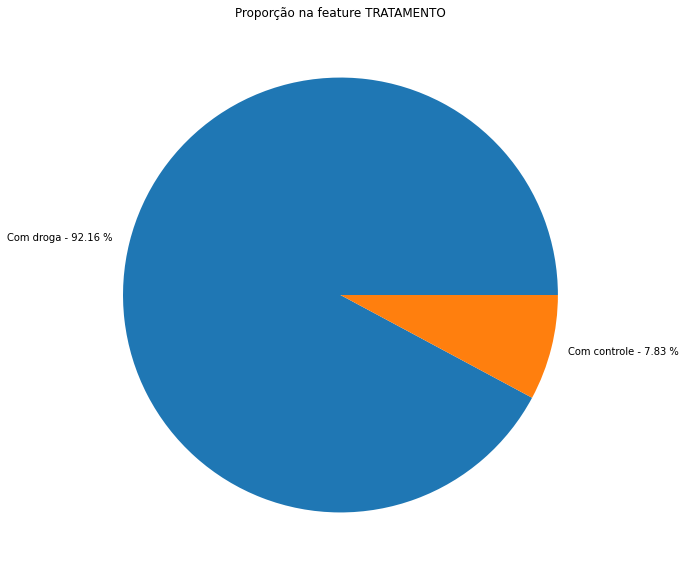

In [50]:
fig, ax = plt.subplots(figsize = (10,10))
plt.pie(df.tratamento.value_counts(), labels = ['Com droga - 92.16 %', 'Com controle - 7.83 %'], labeldistance= 1.08)
plt.title('Proporção na feature TRATAMENTO')
plt.show()

conforme já explorado acima no DESAFIO 1, este desequilibrio entre o grupo de controle e os testes reais se explica pelo fato de que o dataset possui diversos ensaios clicnicos de diversas drogas para a mesma comorbidade.

# Desafio 04 - Aula 1

Descrição: Quantos tipos de drogas foram avaliados nesta base de dados?

Proposta:

In [52]:
len(df.droga.unique())

3289

Em um primeiro momento podemos dizer que tivemos o estudo total de 3289 drogas diferentes, porém temos um ponto de atenção. Foi designado uma droga fictícia ao grupo de controle? Qual seria o seu nome? Abaixo vamos descobrir:

In [54]:
df.query('tratamento == "com_controle"').droga.unique()

array(['cacb2b860'], dtype=object)

Na query acima identificamos que foi designada ao grupo de controle a droga: 

**cacb2b860**

Ou seja, podemos responder ao desafio 4 de duas maneiras distintas:

1 - Testaram-se 3289 drogas

2 - Testaram-se 3288 drogas reais e o placebo cacb2b860.

# Desafio 05 - Aula 1

Descrição: Procurar na documentação do PANDAS o método query.

Proposta:

Seguindo em um primeiro momento método já conhecido.

In [59]:
    df.loc[df['g-0'] > 0].index

Int64Index([    0,     1,     2,     6,     7,    12,    14,    15,    16,
               22,
            ...
            23799, 23801, 23802, 23803, 23805, 23807, 23808, 23809, 23811,
            23812],
           dtype='int64', length=11769)

Existem diversas formas de executar uma query no PANDAS, abaixo o método QUERY

In [ ]:
#df.query('g-0 > 0').index#

Ao executar a query acima encontramos um erro pois o hífen está gerando problema no código. Abaixo iremos tratar com a função replace e retirar os hífens das colunas. Para isto precisaremos chamar o operador STR, que lida com strings.

In [70]:
df.columns = df.columns.str.replace('-','')

In [71]:
df.head()

id tratamento  tempo dose  ...     c96     c97     c98     c99
0  id_000644bb2  com_droga     24   D1  ... -0.3981  0.2139  0.3801  0.4176
1  id_000779bfc  com_droga     72   D1  ...  0.1522  0.1241  0.6077  0.7371
2  id_000a6266a  com_droga     48   D1  ... -0.6417 -0.2187 -1.4080  0.6931
3  id_0015fd391  com_droga     48   D1  ... -1.6210 -0.8784 -0.3876 -0.8154
4  id_001626bd3  com_droga     72   D2  ...  0.1094  0.2885 -0.3786  0.7125

[5 rows x 877 columns]

Conforme acima, podemos observar que a função replace cumpriu seu papel. Vamos para a query.

In [72]:
df.query('g0 > 0').index

Int64Index([    0,     1,     2,     6,     7,    12,    14,    15,    16,
               22,
            ...
            23799, 23801, 23802, 23803, 23805, 23807, 23808, 23809, 23811,
            23812],
           dtype='int64', length=11769)

# Desafio 06 - Aula 1

Descrição: Retirar o hífen do nome das colunas que contenha.

Proposta: Este desafio foi cumprido no Desafio 5 quando foi requisitado a execução da query. Abaixo repetirei o código.

In [94]:
#df.columns = df.columns.str.replace('-','')

# Desafio 07 - Aula 1

Descrição: Trabalhar no tratamento visual do gráfico da feature tempo. Inserir título, nome nos eixos, etc...

Proposta:

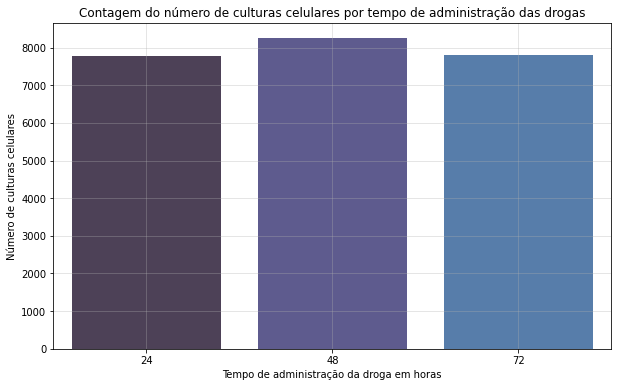

In [92]:
fig, ax = plt.subplots(figsize = (10,6))
sns.countplot(data = df, x = 'tempo', ax = ax, palette = sns.color_palette("mako"), saturation = 0.95, alpha = 0.85)
plt.xlabel('Tempo de administração da droga em horas')
plt.ylabel('Número de culturas celulares')
plt.title('Contagem do número de culturas celulares por tempo de administração das drogas')
plt.grid(alpha = 0.4)

# Desafio 08 - Aula 1

Descrição: Resumir o aprendizado até o momento com as análises obtidas.

Proposta:

O dataset proposto é uma estudo clínico do qual o objetivo é entender a resposta de culturas celulares à diferentes fármacos, dosagens e tempos de exposição.

O número total de culturas celulares é de 23814, sendo 1866 culturas de controle. A cultura de controle é uma forma de validar os resultados obtidos com drogas reais, também conhecido como placebo.

No total temos 3289 drogas que foram testadas, sendo que 1 é o placebo do grupo de controle. Muitas drogas foram testadas apenas em 1 cultura celular, nestes casos o resultado não tem relevância para o estudo clínico, pois estatisticamente são ruins.

Temos diferentes tempos de exposição às drogas, pois a cinética bioquímica pode responder de formas variadas à diferentes substâncias. De forma geral se distribuiu uniformemente entre 24,48 e 72 horas.

A dosagem foi também controlado, sendo dividida em: D1 e D2. Aproximadamente com uma divisão 50:50 no dataset.

As demais colunas g# e c# são referentes às respostas gênicas das células às diferentes variáveis do processo. Aparentemente estas colunas estão normalizadas para padronizar o dataset.



# Desafio Extra - Danilo Yukihara - Aula 1

Descrição: Entender dentro do grupo de controle:

1 - Droga utilizada(s)

2 - Dosagen(s) utilizada(s) e sua proporção

3 - Tempo(s) utilizados(s) e sua proporção

4 - Resumo e conclusão desta análise

Proposta:

In [112]:
df_controle = df.query('tratamento == "com_controle"')

1 - Droga utilizada

In [116]:
df_controle.droga.unique()

array(['cacb2b860'], dtype=object)

2 - Dosagen(s) utilizada(s) e sua proporção

In [117]:
df_controle.dose.value_counts()

D1    951
D2    915
Name: dose, dtype: int64

In [118]:
df_controle.dose.value_counts(normalize= True)

D1    0.509646
D2    0.490354
Name: dose, dtype: float64

3 - Tempo(s) utilizado(s) e sua proporção

In [119]:
df_controle.tempo.value_counts()

48    648
72    612
24    606
Name: tempo, dtype: int64

In [120]:
df_controle.tempo.value_counts(normalize= True)

48    0.347267
72    0.327974
24    0.324759
Name: tempo, dtype: float64

4 - Resumo e conclusão das análises

De maneira geral ao isolar apenas o grupo de controle as variáveis dose e tempo se mantém com o mesmo comportamento.

Manter a distribuição e comportamento é encarado de forma positiva, uma vez que o grupo de controle não pode ter viés.